In [1]:
import sys 
sys.path.insert(1, '../')

In [3]:
import os
import pylab as plt
import numpy as np

from tqdm import tqdm

from Models.Higgins1D.Higgins1DConfiguration import Higgins1DConfiguration
from Models.TdmaParameters1D import TdmaParameters1D
from DataAnalyzers.PeaksAnalyzer import calc_peacks
from DataContainers.Experiment import Experiment
from Drawing.DrawHelper import set_defaults_1D
from Drawing.DrawTransient1d import draw_arr_WxH

In [4]:
base_dir = 'D:/math/data05_12_2020'
set_defaults_1D()

### Про однопик

In [28]:
data_dir = f'{base_dir}/OnePeakInvestigation'

In [29]:
def find_anomalies(path):
    candidates = {}
    for f_peak in tqdm(os.listdir(path)):
        for f_du in os.listdir(f'{path}/{f_peak}'):
            candidates[f_du] = candidates.get(f_du, set())
            res = candidates[f_du]
            peaks = None
            for f_to_compare in os.listdir(f'{path}/{f_peak}/{f_du}'):
                e = Experiment().fill_from_file(f'{path}/{f_peak}/{f_du}/{f_to_compare}') 
                if peaks is None:
                    peaks = calc_peacks(e.end_values['u'])
                elif peaks != calc_peacks(e.end_values['u']):
                    res.add(f'{path}/{f_peak}/{f_du}')
    return candidates

In [30]:
soft_bads = find_anomalies(f'{data_dir}/soft_case')

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:47<00:00,  2.49s/it]


{'dx': 0.05, 'dt': 0.01, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 100, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.1, 'dt': 0.01, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 100, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.2, 'dt': 0.01, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 100, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.05, 'dt': 0.05, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 20, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.1, 'dt': 0.05, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 20, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.2, 'dt': 0.05, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 20, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.05, 'dt': 0.1, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 10, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.1, 'dt': 0.1, 't_max

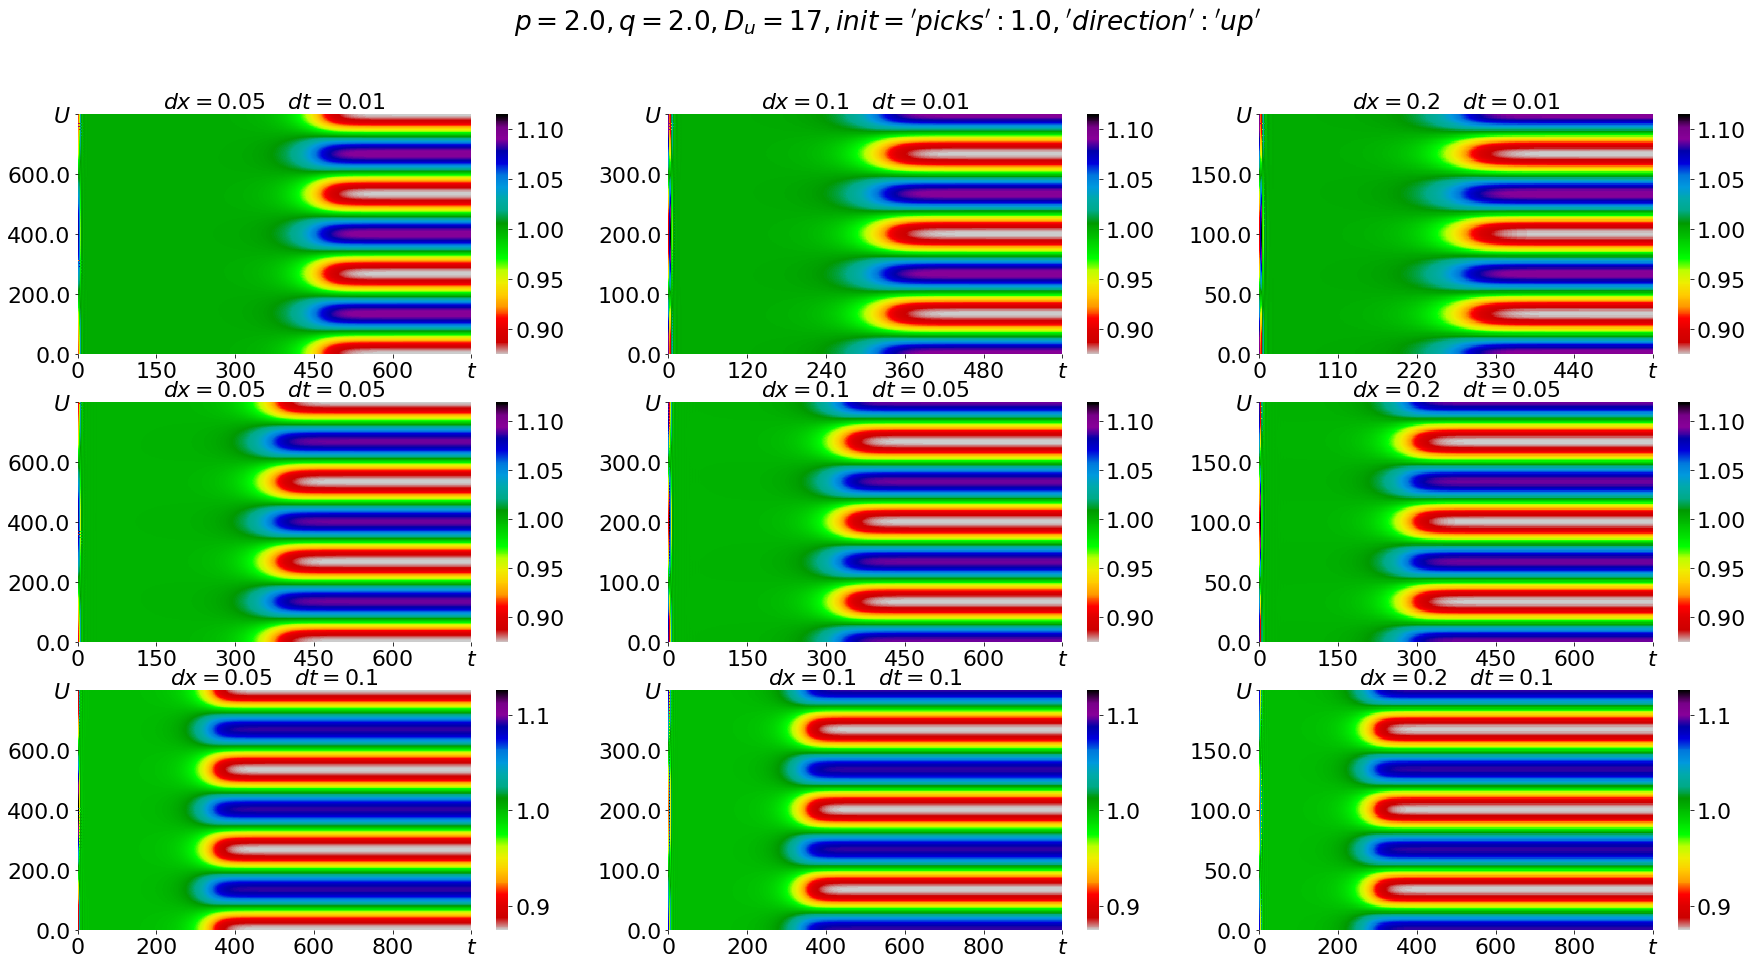

{'dx': 0.05, 'dt': 0.01, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 100, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.1, 'dt': 0.01, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 100, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.2, 'dt': 0.01, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 100, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.05, 'dt': 0.05, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 20, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.1, 'dt': 0.05, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 20, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.2, 'dt': 0.05, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 20, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.05, 'dt': 0.1, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 10, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.1, 'dt': 0.1, 't_max

KeyboardInterrupt: 

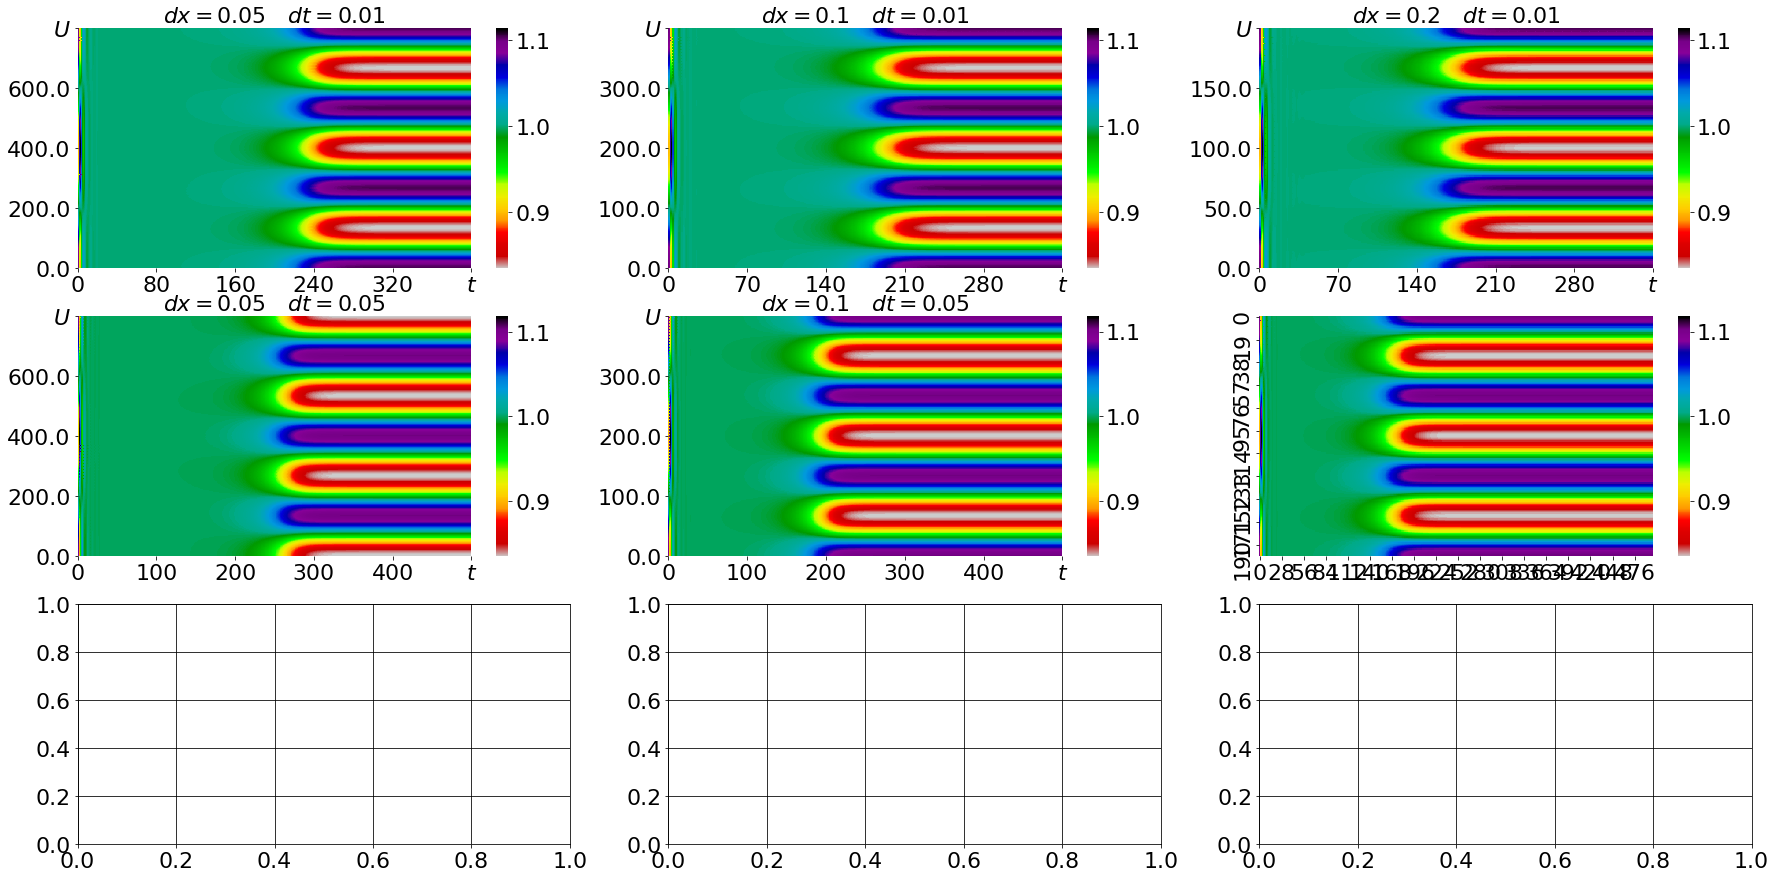

In [34]:
path_to_save_pics = 'C:/Users/alexandr.pankratov/Desktop/pics/anomalies'
for i, key in enumerate(list(soft_bads.keys())[1:]):
    for path in soft_bads[key]:
        to_draw = []
        for p in os.listdir(path):
            if 'dt' in p: #есть мусорные папки
                to_draw.append(Experiment().fill_from_file(f'{path}/{p}', load_timelines=True))
        fig, ax = draw_arr_WxH(to_draw)
        plt.savefig(f'{path_to_save_pics}/{i}.png')
        plt.clf()
        plt.cla()

In [ ]:
path_to_save_pics = 'C:/Users/alexandr.pankratov/Desktop/pics/anomalies_Du16'
for i, path in enumerate(sorted(soft_bads['Du_16'])):
    to_draw = []
    for p in os.listdir(path):
        if 'dt' in p: #есть мусорные папки
            to_draw.append(Experiment().fill_from_file(f'{path}/{p}', load_timelines=True))
    fig, ax = draw_arr_WxH(to_draw)
    plt.savefig(f'{path_to_save_pics}/{i}.png')
    plt.clf()
    plt.cla()
print()

In [6]:
hard_bads = find_anomalies(f'{data_dir}/hard_case')

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:28<00:00,  1.52s/it]


In [ ]:
path_to_save_pics = 'C:/Users/alexandr.pankratov/Desktop/pics/anomalies_hard_case'
for i, key in enumerate(list(hard_bads.keys())):
    for j, path in enumerate(hard_bads[key]):
        to_draw = []
        for p in os.listdir(path):
            if 'dt' in p: #есть мусорные папки
                to_draw.append(Experiment().fill_from_file(f'{path}/{p}', load_timelines=True))
        fig, ax = draw_arr_WxH(to_draw)
        plt.savefig(f'{path_to_save_pics}/{i}_{j}.png')
        plt.clf()
        plt.cla()

In [14]:
def calc_all_the_picks(path):
    res = {}
    for f in os.listdir(path):
        e = Experiment().fill_from_file(f'{path}/{f}')
        peaks = tuple(calc_peacks(e.end_values['u']).values())
        res[peaks] = res.get(peaks, [])
        res[peaks].append(f)
    return res

In [15]:
from4Peak = calc_all_the_picks(f'{base_dir}/tryFind4Peak/from4peak')

In [19]:
from4Peak.keys()

dict_keys([(3.0, 'down')])

In [22]:
fromRand = calc_all_the_picks(f'{base_dir}/tryFind4Peak/fromRand')

In [24]:
fromRand.keys()

dict_keys([(3.5, 'down'), (3.5, 'up'), (3.0, 'up'), (3.0, 'down')])